In [47]:
!pip install transformers datasets pytorch_lightning torchmetrics tableprint

# Fine-tuning a BERT model for single-sentence binary classification

## Check for CUDA

In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

## Loading pre-trained model and tokenizer

In [69]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
model_path= 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_path)
model = DistilBertForSequenceClassification.from_pretrained(model_path, id2label={0:"NEG", 1:"POS"}, label2id={"NEG":0, "POS":1})

https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpgudvpfwc


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10c3c92122b827d92eb2d34ce94ee79ba486c.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
creating metadata file for /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10c3c92122b827d92eb2d34ce94ee79ba486c.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpicwdiyac


Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/75abb59d7a06f4f640158a9bfcde005264e59e8d566781ab1415b139d2e4c603.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
creating metadata file for /root/.cache/huggingface/transformers/75abb59d7a06f4f640158a9bfcde005264e59e8d566781ab1415b139d2e4c603.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpjbdbdvt0


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/8c8624b8ac8aa99c60c912161f8332de003484428c47906d7ff7eb7f73eecdbb.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
creating metadata file for /root/.cache/huggingface/transformers/8c8624b8ac8aa99c60c912161f8332de003484428c47906d7ff7eb7f73eecdbb.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10c3c92122b827d92eb2d34ce94ee79ba486c.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/75abb59d7a06f4f640158a9bfcde005264e59e8d566781ab1415b139d2e4c603.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4


Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
creating metadata file for /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
creating metadata file for /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
loading weights file https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bia

## Loading popular IMDB dataset

In [70]:
from datasets import load_dataset

# to take entire dataset from original train 25 K AND TEST 25K
'''
imdb_train= load_dataset('imdb', split="train")
imdb_test= load_dataset('imdb', split="test[:6250]+test[-6250:]")
imdb_val= load_dataset('imdb', split="test[6250:12500]+test[-12500:-6250]")

'''
# to take smaller portion 4K for train, 1K for test and 1K for validation
imdb_train= load_dataset('imdb', split="train[:2000]+train[-2000:]")
imdb_test= load_dataset('imdb', split="test[:500]+test[-500:]")
imdb_val= load_dataset('imdb', split="test[500:1000]+test[-1000:-500]")

Reusing dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a)
Reusing dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a)
Reusing dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a)


## Exploring the Dataset

In [71]:
imdb_train.shape, imdb_test.shape, imdb_val.shape

((4000, 2), (1000, 2), (1000, 2))

In [72]:
import pandas as pd

In [73]:
pd.DataFrame(imdb_train)

,text,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1
...,...,...
3995,"Towards the end of the movie, I felt it was to...",0
3996,This is the kind of movie that my enemies cont...,0
3997,I saw 'Descent' last night at the Stockholm Fi...,0
3998,Some films that you pick up for a pound turn o...,0


## Tokenizing the Dataset

In [74]:
enc_train = imdb_train.map(lambda e: tokenizer( e['text'], padding=True, truncation=True, max_length=512), batched=True, batch_size=1000) 
enc_test =  imdb_test.map(lambda e: tokenizer( e['text'], padding=True, truncation=True, max_length=512), batched=True, batch_size=1000) 
enc_val =   imdb_val.map(lambda e: tokenizer( e['text'], padding=True, truncation=True, max_length=512), batched=True, batch_size=1000) 

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [75]:
print(enc_train[0]['input_ids'])

[101, 22953, 2213, 4381, 2152, 2003, 1037, 9476, 4038, 1012, 2009, 2743, 2012, 1996, 2168, 2051, 2004, 2070, 2060, 3454, 2055, 2082, 2166, 1010, 2107, 2004, 1000, 5089, 1000, 1012, 2026, 3486, 2086, 1999, 1996, 4252, 9518, 2599, 2033, 2000, 2903, 2008, 22953, 2213, 4381, 2152, 1005, 1055, 18312, 2003, 2172, 3553, 2000, 4507, 2084, 2003, 1000, 5089, 1000, 1012, 1996, 25740, 2000, 5788, 13732, 1010, 1996, 12369, 3993, 2493, 2040, 2064, 2156, 2157, 2083, 2037, 17203, 5089, 1005, 13433, 8737, 1010, 1996, 9004, 10196, 4757, 1997, 1996, 2878, 3663, 1010, 2035, 10825, 2033, 1997, 1996, 2816, 1045, 2354, 1998, 2037, 2493, 1012, 2043, 1045, 2387, 1996, 2792, 1999, 2029, 1037, 3076, 8385, 2699, 2000, 6402, 2091, 1996, 2082, 1010, 1045, 3202, 7383, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 2012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 2152, 1012, 1037, 4438, 2240, 1024, 7742, 1024, 1045, 1005, 1049, 2182, 2000, 12803, 2028, 1997, 2115, 5089, 1012, 3076, 1024, 6160,

In [76]:
pd.DataFrame(enc_train)

,attention_mask,input_ids,label,text
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 22953, 2213, 4381, 2152, 2003, 1037, 947...",1,Bromwell High is a cartoon comedy. It ran at t...
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 11573, 2791, 1006, 2030, 2160, 24913, 20...",1,Homelessness (or Houselessness as George Carli...
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 8235, 2058, 1011, 3772, 2011, 23920, 575...",1,Brilliant over-acting by Lesley Ann Warren. Be...
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 2023, 2003, 4089, 1996, 2087, 2104, 9250...",1,This is easily the most underrated film inn th...
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 2023, 2003, 2025, 1996, 5171, 11463, 837...",1,This is not the typical Mel Brooks film. It wa...
...,...,...,...,...
3995,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 2875, 1996, 2203, 1997, 1996, 3185, 1010...",0,"Towards the end of the movie, I felt it was to..."
3996,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 2023, 2003, 1996, 2785, 1997, 3185, 2008...",0,This is the kind of movie that my enemies cont...
3997,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 1045, 2387, 1005, 6934, 1005, 2197, 2305...",0,I saw 'Descent' last night at the Stockholm Fi...
3998,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 2070, 3152, 2008, 2017, 4060, 2039, 2005...",0,Some films that you pick up for a pound turn o...


## Trainer Arguments

<img src="trainer_args.png" alt="Drawing" style="width: 500px;"/>

In [ ]:
from transformers import TrainingArguments, Trainer
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='./MyIMDBModel', 
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0 
    num_train_epochs=1,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=64,
    # Number of steps used for a linear warmup
    warmup_steps=100,                
    weight_decay=0.01,
    logging_strategy='steps', 
    # TensorBoard log directory               
    logging_dir='./logs',            
    logging_steps=50,
    # other options : no, steps
#     evaluation_strategy="steps",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    fp16=cuda.is_available(),
    load_best_model_at_end=True
)

## Function for Evaluating Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

## Trainer

In [ ]:
trainer = Trainer(
    # the pre-trained model that will be fine-tuned 
    model=model,
     # training arguments that we defined above                        
    args=training_args,
    # training and validation dataset                 
    train_dataset=enc_train,         
    eval_dataset=enc_val,            
    compute_metrics= compute_metrics
)

Using amp fp16 backend


In [ ]:
results=trainer.train()

The following columns in the training set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text.
***** Running training *****
  Num examples = 4000
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 125


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.344900,0.247968,0.913000,0.912996,0.913081,0.913000


The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 64
Saving model checkpoint to ./MyIMDBModel/checkpoint-125
Configuration saved in ./MyIMDBModel/checkpoint-125/config.json
Model weights saved in ./MyIMDBModel/checkpoint-125/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./MyIMDBModel/checkpoint-125 (score: 0.24796795845031738).


## Evaluating on Dataset

In [ ]:
q=[trainer.evaluate(eval_dataset=data) for data in [enc_train, enc_val, enc_test]]
pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 4000
  Batch size = 64


The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 64
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 64


,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.200996,0.93325,0.933206,0.934402,0.93325
val,0.247968,0.91300,0.912996,0.913081,0.91300
test,0.256469,0.89500,0.894954,0.895698,0.89500


## saving the best fine-tuned model & tokenizer

In [ ]:
model_save_path = "MyBestIMDBModel"
trainer.save_model(model_save_path)
tokenizer.save_pretrained(model_save_path)

Saving model checkpoint to MyBestIMDBModel
Configuration saved in MyBestIMDBModel/config.json
Model weights saved in MyBestIMDBModel/pytorch_model.bin
tokenizer config file saved in MyBestIMDBModel/tokenizer_config.json
Special tokens file saved in MyBestIMDBModel/special_tokens_map.json


('MyBestIMDBModel/tokenizer_config.json',
 'MyBestIMDBModel/special_tokens_map.json',
 'MyBestIMDBModel/vocab.txt',
 'MyBestIMDBModel/added_tokens.json',
 'MyBestIMDBModel/tokenizer.json')

## Making Predictions

### Using Custom Function

In [ ]:
def get_prediction(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=250, return_tensors="pt").to(device)
    outputs = model(inputs["input_ids"].to(device),inputs["attention_mask"].to(device))
    probs = outputs[0].softmax(1)
    return probs, probs.argmax()

In [ ]:
text = "I didn't like the movie since it bored me "
inputs = tokenizer(text, padding=True, truncation=True, max_length=250, return_tensors="pt")
outputs = model(inputs["input_ids"],inputs["attention_mask"])

In [ ]:
model.to(device)
text = "I didn't like the movie since it bored me "
get_prediction(text)[1].item()

0

In [ ]:
text = "the movie was very impressive"
get_prediction(text)[1].item()

1

### Using the Pipeline API

In [ ]:
from transformers import pipeline, DistilBertForSequenceClassification, DistilBertTokenizerFast
model = DistilBertForSequenceClassification.from_pretrained("MyBestIMDBModel")
tokenizer= DistilBertTokenizerFast.from_pretrained("MyBestIMDBModel")
nlp= pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

loading configuration file MyBestIMDBModel/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEG",
    "1": "POS"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEG": 0,
    "POS": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.12.3",
  "vocab_size": 30522
}

loading weights file MyBestIMDBModel/pytorch_model.bin
All model checkpoint weights were used when initializing DistilBertForSequenceClassification.

All the weights of DistilBertForSequenceClassific

In [ ]:
nlp("the movie was very impressive")

[{'label': 'POS', 'score': 0.9626902937889099}]

In [ ]:
nlp("the script of the picture was very poor")

[{'label': 'NEG', 'score': 0.9441614151000977}]

# Training a classification model with native PyTorch

## Instantiating Model and Tokenizer

In [ ]:
from transformers import DistilBertForSequenceClassification
model_path= 'distilbert-base-uncased'
model = DistilBertForSequenceClassification.from_pretrained(model_path)

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

In [ ]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained(model_path)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

## Parsing One Example

In [ ]:
import torch
texts= ["this is a good example","this is a bad example","this is a good one"]
labels= [1,0,1]
labels = torch.tensor(labels).unsqueeze(0)

encoding = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
input_ids = encoding['input_ids']
attention_mask = encoding['attention_mask']

outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
outputs

SequenceClassifierOutput([('loss', tensor(0.6661, grad_fn=<NllLossBackward0>)),
                          ('logits', tensor([[-0.0428,  0.1745],
                                   [-0.0403,  0.1664],
                                   [-0.0073,  0.1751]], grad_fn=<AddmmBackward0>))])

In [ ]:
outputs.logits.shape, labels.shape

(torch.Size([3, 2]), torch.Size([1, 3]))

### Calculating Loss Automtically (i.e. from Model)

Note that we passed the labels to the model. Hence, it has calculated the loss for us.

In [ ]:
loss = outputs.loss
loss

tensor(0.6661, grad_fn=<NllLossBackward0>)

### Calculating Loss Manually

In [ ]:
from torch.nn import functional
labels = torch.tensor([1,0,1])
outputs = model(input_ids, attention_mask=attention_mask)
outputs

SequenceClassifierOutput([('logits', tensor([[-0.0428,  0.1745],
                                   [-0.0403,  0.1664],
                                   [-0.0073,  0.1751]], grad_fn=<AddmmBackward0>))])

In [ ]:
outputs.logits.shape, labels.shape

(torch.Size([3, 2]), torch.Size([3]))

In [ ]:
loss = functional.cross_entropy(outputs.logits, labels)
loss

tensor(0.6661, grad_fn=<NllLossBackward0>)

## Loading Data

In [ ]:
import datasets
from datasets import load_dataset
sst2= load_dataset("glue","sst2")
from datasets import load_metric
metric_train = load_metric("glue", "sst2")
metric_val = load_metric("glue", "sst2")

Downloading:   0%|          | 0.00/7.78k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.47k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/7.44M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.86k [00:00<?, ?B/s]

In [ ]:
texts=sst2['train']['sentence']
labels=sst2['train']['label']
val_texts=sst2['validation']['sentence']
val_labels=sst2['validation']['label']

## Pytorch Dataset and DataLoader

In [ ]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

In [ ]:
# Taking a Subset of Data
K=10000
train_dataset= MyDataset(tokenizer(texts[:K], truncation=True, max_length=512, padding=True), labels[:K])
val_dataset=  MyDataset(tokenizer(val_texts, truncation=True, max_length=512, padding=True), val_labels)

Use either this...

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

train_sampler = RandomSampler(train_dataset)
train_loader = DataLoader(train_dataset, sampler=train_sampler, batch_size = 16)

val_sampler = SequentialSampler(val_dataset)
val_loader = DataLoader(val_dataset, sampler=val_sampler, batch_size = 32)

or this...

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader =  DataLoader(val_dataset, batch_size=32, shuffle=False)

## Training Loop

In [ ]:
import time
import datetime

import torch
import torch.nn as nn

import pytorch_lightning as pl
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks import ModelCheckpoint

import tableprint as tp
import torchmetrics
from transformers import  AdamW


In [ ]:
class Model_TL(pl.LightningModule):
    def __init__(self, model, metric_train, metric_val):
        super(Model_TL, self).__init__()
        self.model = model
        self.avg_train_loss = 0.
        self.avg_valid_loss = 0.
        self.table_context = None
        self.loss_fn = nn.CrossEntropyLoss()
        self.start_time = 0
        self.end_time = 0
        self.epoch_mins = 0
        self.epoch_secs = 0
        self.table_context = None
        self.train_accm = torchmetrics.Accuracy()
        self.valid_accm = torchmetrics.Accuracy()
        self.train_acc = 0.
        self.valid_acc = 0.
        self.train_acc_hf = 0.
        self.valid_acc_hf = 0.
        self.metric_train = metric_train
        self.metric_val = metric_val
        

    def configure_optimizers(self):
        optim = torch.optim.AdamW(self.parameters(), lr=1e-5)
        return optim


    def training_step(self, batch, batch_idx):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
        predictions=outputs.logits.argmax(dim=-1)  
        acc_train = self.train_accm(predictions, labels)
#         loss = self.loss_fn(outputs.logits, labels)
        loss = outputs.loss
        self.metric_train.add_batch(
                predictions=predictions,
                references=batch["labels"],
            )
        return {"loss": loss, "p": predictions, "y": labels}
    
    
    def validation_step(self, batch, batch_idx):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
        predictions=outputs.logits.argmax(dim=-1)  
        acc_valid = self.valid_accm(predictions, labels)
#         loss_valid = self.loss_fn(outputs.logits, labels)
        loss_valid = outputs.loss
        self.metric_val.add_batch(
                predictions=predictions,
                references=batch["labels"],
            )
        return {"loss": loss_valid, "p": predictions, "y": labels}


    def on_train_epoch_start(self) :
        self.start_time = time.time()


    def validation_epoch_end(self, outputs):
        if self.trainer.sanity_checking:
            return
        
        self.avg_valid_loss = torch.stack([x['loss'] for x in outputs]).mean().item()
        self.valid_acc = (self.valid_accm.compute() * 100).item()
        self.valid_accm.reset()
        self.valid_acc_hf  = metric_val.compute()['accuracy']*100
        self.log("epoch_num", int(self.current_epoch+1), on_step=False, on_epoch=True, prog_bar=False, logger=False)
        self.log("val_loss", self.avg_valid_loss, on_step=False, on_epoch=True, prog_bar=False, logger=False)
        self.log("val_acc", self.valid_acc, on_step=False, on_epoch=True, prog_bar=False, logger=False)
        
#         if self.current_epoch == self.trainer.max_epochs - 1:
#             y = torch.cat([x['y'] for x in outputs])
#             p = torch.cat([x['p'] for x in outputs])
          

    def training_epoch_end(self, outputs):
        self.avg_train_loss = torch.stack([x['loss'] for x in outputs]).mean().item()
        self.train_acc = (self.train_accm.compute() * 100).item()
        self.train_accm.reset()
        self.train_acc_hf  = metric_train.compute()['accuracy']*100

    def on_train_epoch_end(self):
        self.end_time = time.time()
        time_int = self.format_time(self.start_time, self.end_time)
    
        metrics = {'epoch': self.current_epoch+1, 'Train Acc': self.train_acc, 'Train Loss': self.avg_train_loss,  'Valid Acc': self.valid_acc, 'Valid Loss': self.avg_valid_loss}
        if self.table_context is None:
            self.table_context = tp.TableContext(headers=['epoch', 'Train Acc', 'Train Acc HF', 'Train Loss', 'Valid Acc', 'Val  Acc HF', 'Valid Loss', 'Time'])
            self.table_context.__enter__()
        self.table_context([self.current_epoch+1, self.train_acc, self.train_acc_hf, self.avg_train_loss, self.valid_acc, self.valid_acc_hf, self.avg_valid_loss, time_int])
        self.logger.log_metrics(metrics)

        if self.current_epoch == self.trainer.max_epochs - 1:
            self.table_context.__exit__()

    
    def format_time(self, start_time, end_time):
        elapsed_time = end_time - start_time
        elapsed_rounded = int(round((elapsed_time)))
        return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
plmodel = Model_TL(model, metric_train, metric_val)

In [ ]:
checkpoint_callback = ModelCheckpoint(
    monitor='val_acc',
    dirpath='./',
    filename='model',
    mode='max'
)
csvlogger = CSVLogger('csv_logs', name='Ch5', version=0)

In [ ]:
trainer = pl.Trainer(max_epochs=3, num_sanity_val_steps=0, logger=csvlogger, gpus=1, callbacks=[checkpoint_callback], log_every_n_steps=1)
trainer.fit(plmodel, train_dataloaders=train_loader, val_dataloaders=val_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type                                | Params
-------------------------------------------------------------------
0 | model      | DistilBertForSequenceClassification | 67.0 M
1 | loss_fn    | CrossEntropyLoss                    | 0     
2 | train_accm | Accuracy                            | 0     
3 | valid_accm | Accuracy                            | 0     
-------------------------------------------------------------------
67.0 M    Trainable params
0         Non-trainable params
67.0 M    Total params
267.820   Total estimated model params size (MB)
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:617: UserWarning: Checkpoint directory /content exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
/usr/local/lib/python3.7/dist-packa

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

╭─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────╮
│       epoch │   Train Acc │ Train Acc HF │  Train Loss │   Valid Acc │ Val  Acc HF │  Valid Loss │        Time │
├─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│           1 │       85.32 │       85.32 │     0.34313 │      88.417 │      88.417 │     0.27553 │     0:02:18 │


Validating: 0it [00:00, ?it/s]

│           2 │       93.26 │       93.26 │     0.18318 │      89.106 │      89.106 │     0.29573 │     0:02:18 │


Validating: 0it [00:00, ?it/s]

│           3 │        96.3 │        96.3 │     0.11178 │      88.876 │      88.876 │     0.29836 │     0:02:13 │
╰─────────────┴─────────────┴─────────────┴─────────────┴─────────────┴─────────────┴─────────────┴─────────────╯


# FineTuning BERT for Multi-Class Classification with custom datasets

## Obtain Data

In [2]:
import os
if "TTC4900.csv" not in os.listdir():
    !wget  https://raw.githubusercontent.com/savasy/TurkishTextClassification/master/TTC4900.csv
else:
    print("Already there !")

--2021-11-16 11:33:28--  https://raw.githubusercontent.com/savasy/TurkishTextClassification/master/TTC4900.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10627541 (10M) [text/plain]
Saving to: ‘TTC4900.csv’

TTC4900.csv         100%[===================>]  10.13M  --.-KB/s    in 0.1s    

2021-11-16 11:33:28 (92.7 MB/s) - ‘TTC4900.csv’ saved [10627541/10627541]



## Loading Data

In [17]:
import pandas as pd
data= pd.read_csv("TTC4900.csv")
data=data.sample(frac=1.0, random_state=42)
data.head(5)

,category,text
4657,teknoloji,acıların kedisi sam çatık kaşlı kedi sam in i...
3539,spor,g saray a git santos van_persie den forma ala...
907,dunya,endonezya da çatışmalar 14 ölü endonezya da i...
4353,teknoloji,emniyetten polis logolu virüs uyarısı telefon...
3745,spor,beni türk yapın cristian_baroni yıldırım dan ...


In [18]:
labels=["teknoloji","ekonomi","saglik","siyaset","kultur","spor","dunya"]
NUM_LABELS= len(labels)
id2label={i:l for i,l in enumerate(labels)}
label2id={l:i for i,l in enumerate(labels)}

In [19]:
label2id

{'dunya': 6,
 'ekonomi': 1,
 'kultur': 4,
 'saglik': 2,
 'siyaset': 3,
 'spor': 5,
 'teknoloji': 0}

In [20]:
data["labels"]=data.category.map(lambda x: label2id[x.strip()])

In [21]:
data.head()

,category,text,labels
4657,teknoloji,acıların kedisi sam çatık kaşlı kedi sam in i...,0
3539,spor,g saray a git santos van_persie den forma ala...,5
907,dunya,endonezya da çatışmalar 14 ölü endonezya da i...,6
4353,teknoloji,emniyetten polis logolu virüs uyarısı telefon...,0
3745,spor,beni türk yapın cristian_baroni yıldırım dan ...,5


## Visualizing Data

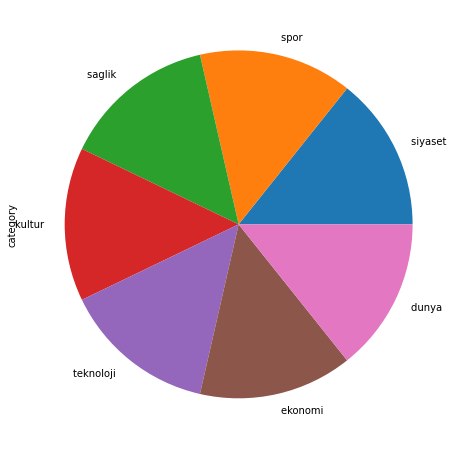

In [22]:
data.category.value_counts().plot(kind='pie', figsize=(8,8))

## Splitting Data

In [23]:
SIZE= data.shape[0]

train_texts= list(data.text[:SIZE//2])
val_texts=   list(data.text[SIZE//2:(3*SIZE)//4 ])
test_texts=  list(data.text[(3*SIZE)//4:])

train_labels= list(data.labels[:SIZE//2])
val_labels=   list(data.labels[SIZE//2:(3*SIZE)//4])
test_labels=  list(data.labels[(3*SIZE)//4:])

In [24]:
len(train_texts), len(val_texts), len(test_texts)

(2450, 1225, 1225)

## Model and Tokenizer

In [25]:
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained("dbmdz/bert-base-turkish-uncased", max_length=512)

from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained("dbmdz/bert-base-turkish-uncased", num_labels=NUM_LABELS, id2label=id2label, label2id=label2id)

Some weights of the model checkpoint at dbmdz/bert-base-turkish-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification wer

## Tokenizing Data

In [26]:
train_encodings = tokenizer(train_texts, return_tensors='pt', truncation=True, padding=True, max_length=512)
val_encodings  = tokenizer(val_texts, return_tensors='pt', truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, return_tensors='pt', truncation=True, padding=True, max_length=512)

In [27]:
train_encodings[0]

Encoding(num_tokens=512, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [28]:
print(train_encodings[0].ids)

[2, 27058, 1976, 8765, 2478, 3735, 11087, 2042, 2862, 1991, 8765, 3735, 2092, 13362, 2170, 4108, 28932, 2478, 3304, 2464, 3735, 2092, 30137, 10779, 5440, 6943, 2958, 3448, 7363, 1024, 2207, 27058, 1976, 8765, 2478, 8273, 2124, 8983, 1028, 23103, 9297, 9314, 2020, 4991, 17634, 1024, 30347, 7544, 24402, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [29]:
train_encodings['input_ids'][0]

tensor([    2, 27058,  1976,  8765,  2478,  3735, 11087,  2042,  2862,  1991,
         8765,  3735,  2092, 13362,  2170,  4108, 28932,  2478,  3304,  2464,
         3735,  2092, 30137, 10779,  5440,  6943,  2958,  3448,  7363,  1024,
         2207, 27058,  1976,  8765,  2478,  8273,  2124,  8983,  1028, 23103,
         9297,  9314,  2020,  4991, 17634,  1024, 30347,  7544, 24402,     3,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

## Parsing One Example

In [30]:
import torch
texts= ["Sinemada hangi filmler oynuyor bugün"]
labels= [1]
labels = torch.tensor(labels).unsqueeze(0)

encoding = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
input_ids = encoding['input_ids']
attention_mask = encoding['attention_mask']

outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
outputs

SequenceClassifierOutput([('loss', tensor(2.2567, grad_fn=<NllLossBackward0>)),
                          ('logits',
                           tensor([[ 0.2466, -0.2347,  0.2751, -0.2079,  0.5345, -0.0972, -0.3010]],
                                  grad_fn=<AddmmBackward0>))])

## Dataset and DataLoader

In [31]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

In [32]:
train_dataset = MyDataset(train_encodings, train_labels)
val_dataset = MyDataset(val_encodings, val_labels)
test_dataset = MyDataset(test_encodings, test_labels)

In [33]:
# from torch.utils.data import DataLoader

# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# val_loader =  DataLoader(val_dataset, batch_size=32, shuffle=False)
# test_loader =  DataLoader(test_dataset, batch_size=32, shuffle=False)

## Training with Trainer Class

In [34]:
from transformers import TrainingArguments, Trainer

In [35]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support 
def compute_metrics(pred): 
    labels = pred.label_ids 
    preds = pred.predictions.argmax(-1) 
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro') 
    acc = accuracy_score(labels, preds) 
    return { 
        'Accuracy': acc, 
        'F1': f1, 
        'Precision': precision, 
        'Recall': recall 
    } 

In [36]:
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='./TTC4900Model', 
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0 
    num_train_epochs=3,              
    per_device_train_batch_size=12,  
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,                
    weight_decay=0.01,
    logging_strategy='steps',
   # TensorBoard log directory                 
    logging_dir='./multi-class-logs',            
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps", 
    fp16=True,
    load_best_model_at_end=True
)

In [37]:
trainer = Trainer(
    # the pre-trained model that will be fine-tuned 
    model=model,
     # training arguments that we defined above                        
    args=training_args,                 
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
    compute_metrics= compute_metrics
)

Using amp fp16 backend


In [38]:
trainer.train()

***** Running training *****
  Num examples = 2450
  Num Epochs = 3
  Instantaneous batch size per device = 12
  Total train batch size (w. parallel, distributed & accumulation) = 12
  Gradient Accumulation steps = 1
  Total optimization steps = 615
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,1.825800,1.533369,0.513469,0.503402,0.731981,0.518937
100,0.829900,0.602538,0.835102,0.816563,0.868439,0.832718
150,0.472000,0.313097,0.912653,0.912513,0.917844,0.912322
200,0.277700,0.394906,0.892245,0.893206,0.901315,0.891814
250,0.219900,0.334599,0.910204,0.910371,0.911449,0.910006
300,0.195900,0.363689,0.922449,0.921111,0.924368,0.922675
350,0.209500,0.380509,0.913469,0.911516,0.917056,0.912610
400,0.218200,0.354446,0.916735,0.915665,0.919411,0.915916
450,0.106900,0.346840,0.922449,0.922093,0.922138,0.922683
500,0.080500,0.331719,0.921633,0.921573,0.921576,0.921688


***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.ten

TrainOutput(global_step=615, training_loss=0.37737014603808644, metrics={'train_runtime': 4141.6479, 'train_samples_per_second': 1.775, 'train_steps_per_second': 0.148, 'total_flos': 1933953073920000.0, 'train_loss': 0.37737014603808644, 'epoch': 3.0})

## Evaluating Datasets

In [39]:
q=[trainer.evaluate(eval_dataset=data) for data in [train_dataset, val_dataset, test_dataset]]
pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

***** Running Evaluation *****
  Num examples = 2450
  Batch size = 32
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.054579,0.986122,0.986154,0.986181,0.986161
val,0.331719,0.921633,0.921573,0.921576,0.921688
test,0.329118,0.924898,0.924361,0.924298,0.924734


## Predictions on Custom Input

In [40]:
def predict(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")
    outputs = model(**inputs)
    probs = outputs[0].softmax(1)
    return probs, probs.argmax(),model.config.id2label[probs.argmax().item()]

In [41]:
# Example #1
text = "Fenerbahçeli futbolcular kısa paslarla hazırlık çalışması yaptılar"
predict(text)

(tensor([[2.6032e-04, 2.8018e-04, 2.9683e-04, 2.8263e-04, 3.0343e-04, 9.9830e-01,
          2.7599e-04]], device='cuda:0', grad_fn=<SoftmaxBackward0>),
 tensor(5, device='cuda:0'),
 'spor')

## Saving Model

In [42]:
model_path = "turkish-text-classification-model"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

Saving model checkpoint to turkish-text-classification-model
Configuration saved in turkish-text-classification-model/config.json
Model weights saved in turkish-text-classification-model/pytorch_model.bin
tokenizer config file saved in turkish-text-classification-model/tokenizer_config.json
Special tokens file saved in turkish-text-classification-model/special_tokens_map.json


('turkish-text-classification-model/tokenizer_config.json',
 'turkish-text-classification-model/special_tokens_map.json',
 'turkish-text-classification-model/vocab.txt',
 'turkish-text-classification-model/added_tokens.json',
 'turkish-text-classification-model/tokenizer.json')

## Loading Model for use with the Pipeline API

In [43]:
model_path = "turkish-text-classification-model"
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer= BertTokenizerFast.from_pretrained(model_path)
nlp= pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

loading configuration file turkish-text-classification-model/config.json
Model config BertConfig {
  "_name_or_path": "dbmdz/bert-base-turkish-uncased",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "teknoloji",
    "1": "ekonomi",
    "2": "saglik",
    "3": "siyaset",
    "4": "kultur",
    "5": "spor",
    "6": "dunya"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "dunya": 6,
    "ekonomi": 1,
    "kultur": 4,
    "saglik": 2,
    "siyaset": 3,
    "spor": 5,
    "teknoloji": 0
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "tra

In [44]:
nlp("Sinemada hangi filmler oynuyor bugün")

[{'label': 'kultur', 'score': 0.9689388871192932}]

In [45]:
nlp("Dolar ve Euro bugün yurtiçi piyasalarda yükseldi")

[{'label': 'ekonomi', 'score': 0.9951948523521423}]

In [46]:
nlp("Bayern Münih ile Barcelona bugün karşı karşıya geliyor. Maçı İngiliz hakem James Watts yönetecek!")

[{'label': 'spor', 'score': 0.9982079267501831}]

# Fine-tuning the BERT model for sentence-pair regression

## Model and Tokenizer

We will use the BERT base model for a regression task to find the extent of similarity in a range of 1-5 (since the dataset has this score as the target).

To acheive this, we will set the number of classes to 1.

In [48]:
from transformers import DistilBertConfig, DistilBertTokenizerFast, DistilBertForSequenceClassification
model_path='distilbert-base-uncased'
config = DistilBertConfig.from_pretrained(model_path, num_labels=1)
tokenizer = DistilBertTokenizerFast.from_pretrained(model_path)
model = DistilBertForSequenceClassification.from_pretrained(model_path, config=config)

https://huggingface.co/distilbert-base-uncased/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpp247kcwe


Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
creating metadata file for /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0"
  },
  "initializer_range": 0.02,
  "

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10c3c92122b827d92eb2d34ce94ee79ba486c.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
creating metadata file for /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10c3c92122b827d92eb2d34ce94ee79ba486c.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpxqidabji


Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/75abb59d7a06f4f640158a9bfcde005264e59e8d566781ab1415b139d2e4c603.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
creating metadata file for /root/.cache/huggingface/transformers/75abb59d7a06f4f640158a9bfcde005264e59e8d566781ab1415b139d2e4c603.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpojcy0tw6


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/8c8624b8ac8aa99c60c912161f8332de003484428c47906d7ff7eb7f73eecdbb.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
creating metadata file for /root/.cache/huggingface/transformers/8c8624b8ac8aa99c60c912161f8332de003484428c47906d7ff7eb7f73eecdbb.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10c3c92122b827d92eb2d34ce94ee79ba486c.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/75abb59d7a06f4f640158a9bfcde005264e59e8d566781ab1415b139d2e4c603.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4


Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
creating metadata file for /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
loading weights file https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight',

## Dataset

In [49]:
import datasets
from datasets import load_dataset
stsb_train= load_dataset('glue','stsb', split="train")
stsb_validation = load_dataset('glue','stsb', split="validation")
stsb_validation=stsb_validation.shuffle(seed=42)
stsb_val= datasets.Dataset.from_dict(stsb_validation[:750])
stsb_test= datasets.Dataset.from_dict(stsb_validation[750:])

Downloading:   0%|          | 0.00/7.78k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.47k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/803k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/stsb/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Reusing dataset glue (/root/.cache/huggingface/datasets/glue/stsb/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


In [50]:
import pandas as pd
pd.DataFrame(stsb_train)

,sentence1,sentence2,label,idx
0,A plane is taking off.,An air plane is taking off.,5.00,0
1,A man is playing a large flute.,A man is playing a flute.,3.80,1
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80,2
3,Three men are playing chess.,Two men are playing chess.,2.60,3
4,A man is playing the cello.,A man seated is playing the cello.,4.25,4
...,...,...,...,...
5744,Severe Gales As Storm Clodagh Hits Britain,Merkel pledges NATO solidarity with Latvia,0.00,5744
5745,Dozens of Egyptians hostages taken by Libyan t...,Egyptian boat crash death toll rises as more b...,0.00,5745
5746,President heading to Bahrain,President Xi: China to continue help to fight ...,0.00,5746
5747,"China, India vow to further bilateral ties",China Scrambles to Reassure Jittery Stock Traders,0.00,5747


In [51]:
stsb_train.shape, stsb_val.shape, stsb_test.shape

((5749, 4), (750, 4), (750, 4))

## Tokenizing Dataset

In [52]:
enc_train = stsb_train.map(lambda e: tokenizer( e['sentence1'],e['sentence2'], padding=True, truncation=True), batched=True, batch_size=1000) 
enc_val =   stsb_val.map(lambda e: tokenizer( e['sentence1'],e['sentence2'], padding=True, truncation=True), batched=True, batch_size=1000) 
enc_test =  stsb_test.map(lambda e: tokenizer( e['sentence1'],e['sentence2'], padding=True, truncation=True), batched=True, batch_size=1000)  

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [53]:
import pandas as pd
pd.DataFrame(enc_train)

,attention_mask,idx,input_ids,label,sentence1,sentence2
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,"[101, 1037, 4946, 2003, 2635, 2125, 1012, 102,...",5.00,A plane is taking off.,An air plane is taking off.
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,"[101, 1037, 2158, 2003, 2652, 1037, 2312, 8928...",3.80,A man is playing a large flute.,A man is playing a flute.
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2,"[101, 1037, 2158, 2003, 9359, 14021, 5596, 209...",3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3,"[101, 2093, 2273, 2024, 2652, 7433, 1012, 102,...",2.60,Three men are playing chess.,Two men are playing chess.
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",4,"[101, 1037, 2158, 2003, 2652, 1996, 10145, 101...",4.25,A man is playing the cello.,A man seated is playing the cello.
...,...,...,...,...,...,...
5744,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5744,"[101, 5729, 14554, 2015, 2004, 4040, 18856, 13...",0.00,Severe Gales As Storm Clodagh Hits Britain,Merkel pledges NATO solidarity with Latvia
5745,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5745,"[101, 9877, 1997, 23437, 19323, 2579, 2011, 19...",0.00,Dozens of Egyptians hostages taken by Libyan t...,Egyptian boat crash death toll rises as more b...
5746,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5746,"[101, 2343, 5825, 2000, 15195, 102, 2343, 8418...",0.00,President heading to Bahrain,President Xi: China to continue help to fight ...
5747,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5747,"[101, 2859, 1010, 2634, 19076, 2000, 2582, 177...",0.00,"China, India vow to further bilateral ties",China Scrambles to Reassure Jittery Stock Traders


## Trainer API

In [54]:
from transformers import TrainingArguments, Trainer

In [55]:
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='./stsb-model', 
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0 
    num_train_epochs=3,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=64,
    # Number of steps used for a linear warmup
    warmup_steps=100,                
    weight_decay=0.01,
    # TensorBoard log directory
    logging_strategy='steps',                
    logging_dir='./logs',            
    logging_steps=50,
    # other options : no, steps
    evaluation_strategy="steps",
    save_strategy="steps",
    fp16=True,
    load_best_model_at_end=True
)

using `logging_steps` to initialize `eval_steps` to 50
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [56]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [57]:
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
def compute_metrics(pred):
    preds = np.squeeze(pred.predictions) 
    return {"MSE": ((preds - pred.label_ids) ** 2).mean().item(),
            "RMSE": (np.sqrt ((  (preds - pred.label_ids) ** 2).mean())).item(),
            "MAE": (np.abs(preds - pred.label_ids)).mean().item(),
            "Pearson" : pearsonr(preds,pred.label_ids)[0],
            "Spearman's Rank" : spearmanr(preds,pred.label_ids)[0]
            }

In [58]:
trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=enc_train,
        eval_dataset=enc_val,
        compute_metrics=compute_metrics,
        tokenizer=tokenizer
    )

Using amp fp16 backend


In [59]:
train_result = trainer.train()
metrics = train_result.metrics

The following columns in the training set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: idx, sentence1, sentence2.
***** Running training *****
  Num examples = 5749
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 540


Step,Training Loss,Validation Loss,Mse,Rmse,Mae,Pearson,Spearman's rank
50,6.293300,2.383269,2.383269,1.543784,1.276997,0.483895,0.542972
100,1.371800,0.767241,0.767241,0.875923,0.719511,0.815335,0.809124
150,0.845100,0.632623,0.632623,0.795376,0.634533,0.845105,0.840311
200,0.663400,0.592925,0.592925,0.770016,0.597648,0.856023,0.851531
250,0.542800,0.599670,0.599670,0.774384,0.602274,0.861026,0.856323
300,0.537900,0.623324,0.623324,0.789509,0.636258,0.863005,0.857922
350,0.457300,0.544159,0.544159,0.737672,0.564744,0.869888,0.864133
400,0.330800,0.578916,0.578916,0.760865,0.580483,0.862921,0.855562
450,0.296400,0.577326,0.577326,0.759820,0.588962,0.864082,0.857569
500,0.291900,0.563360,0.563360,0.750573,0.578103,0.863686,0.856383


The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: idx, sentence1, sentence2.
***** Running Evaluation *****
  Num examples = 750
  Batch size = 64
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: idx, sentence1, sentence2.
***** Running Evaluation *****
  Num examples = 750
  Batch size = 64
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: idx, sentence1, sentence2.
***** Running Evaluation *****
  Num examples = 750
  Batch size = 64
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: idx, sentence1, sentence2.
***** Running Evaluation *****
  Num examples = 750
  Batch size = 64


## Evaluating Datasets

In [60]:
q=[trainer.evaluate(eval_dataset=data) for data in [enc_train, enc_val, enc_test]]
pd.DataFrame(q, index=["train","val","test"]).iloc[:,:6]

The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: idx, sentence1, sentence2.
***** Running Evaluation *****
  Num examples = 5749
  Batch size = 64


The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: idx, sentence1, sentence2.
***** Running Evaluation *****
  Num examples = 750
  Batch size = 64
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: idx, sentence1, sentence2.
***** Running Evaluation *****
  Num examples = 750
  Batch size = 64


,eval_loss,eval_MSE,eval_RMSE,eval_MAE,eval_Pearson,eval_Spearman's Rank
train,0.176942,0.176942,0.420645,0.323057,0.958102,0.950928
val,0.563360,0.563360,0.750573,0.578103,0.863686,0.856383
test,0.527014,0.527014,0.725957,0.553572,0.877967,0.876213


## Saving Model and Tokenizer

In [61]:
model_path = "sentence-pair-regression-model"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

Saving model checkpoint to sentence-pair-regression-model
Configuration saved in sentence-pair-regression-model/config.json
Model weights saved in sentence-pair-regression-model/pytorch_model.bin
tokenizer config file saved in sentence-pair-regression-model/tokenizer_config.json
Special tokens file saved in sentence-pair-regression-model/special_tokens_map.json
tokenizer config file saved in sentence-pair-regression-model/tokenizer_config.json
Special tokens file saved in sentence-pair-regression-model/special_tokens_map.json


('sentence-pair-regression-model/tokenizer_config.json',
 'sentence-pair-regression-model/special_tokens_map.json',
 'sentence-pair-regression-model/vocab.txt',
 'sentence-pair-regression-model/added_tokens.json',
 'sentence-pair-regression-model/tokenizer.json')

## Parsing Custom Inputs

In [62]:
s1,s2="A plane is taking off.",	"An air plane is taking off."

In [63]:
encoding = tokenizer(s1,s2, return_tensors='pt', padding=True, truncation=True, max_length=512)
input_ids = encoding['input_ids'].to(device)
attention_mask = encoding['attention_mask'].to(device)
outputs = model(input_ids, attention_mask=attention_mask)
outputs.logits.item()

4.643237590789795

In [64]:
s1,s2="The men are playing soccer.", "A man is riding a motorcycle."

In [65]:
encoding = tokenizer("hey how are you there","hey how are you", return_tensors='pt', padding=True, truncation=True, max_length=512)
input_ids = encoding['input_ids'].to(device)
attention_mask = encoding['attention_mask'].to(device)
outputs = model(input_ids, attention_mask=attention_mask)
outputs.logits.item()

2.9261832237243652